In [177]:
import pandas as pd
from sklearn import datasets
import seaborn as sns

In [180]:
data = datasets.load_iris()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [182]:
iris = pd.DataFrame(data["data"], columns=data["feature_names"])
iris["target"] = data["target"]
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 圖形比較

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


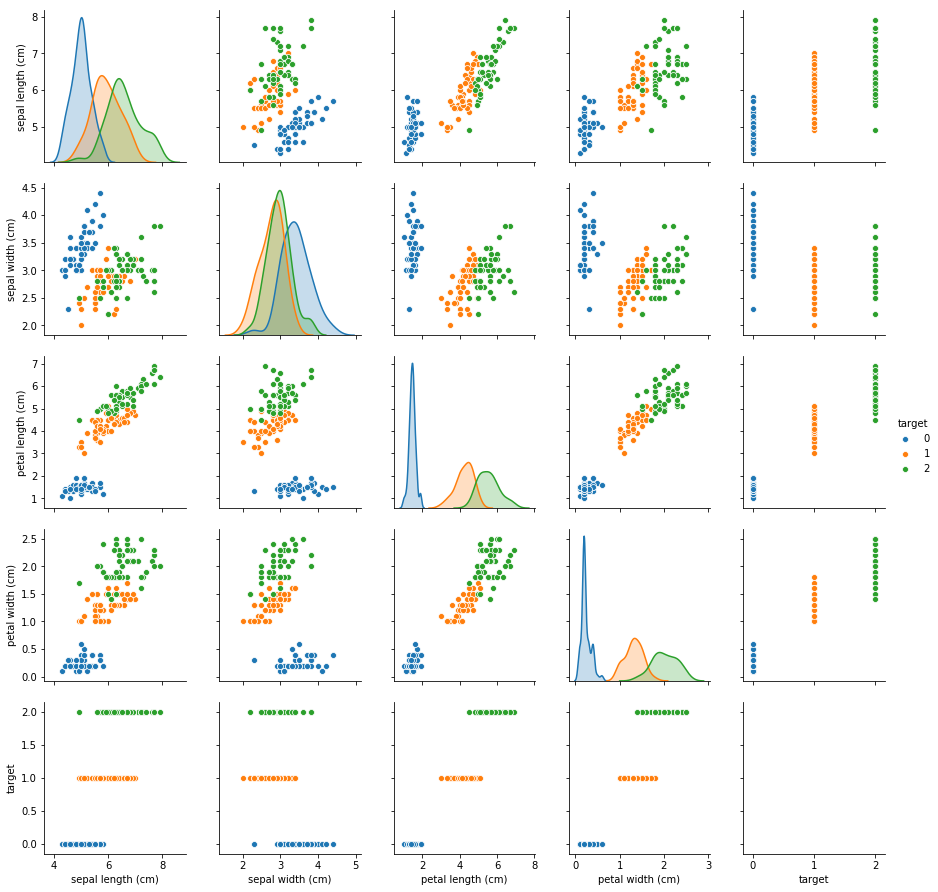

In [4]:
sns.pairplot(hue="target", data=iris.iloc[:, :])

### Training

In [184]:
from sklearn.svm import LinearSVC

In [247]:
X = iris.iloc[:, :4].values
y = iris["target"].values

In [248]:
model = LinearSVC(random_state=99, multi_class='crammer_singer')

In [249]:
model.fit(X=X, y=y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='crammer_singer', penalty='l2', random_state=99,
     tol=0.0001, verbose=0)

In [258]:
b = model.coef_
w = model.intercept_
print(b)
print(w)

[[ 0.62350591  0.81060184 -1.35532965 -0.84178679]
 [ 0.20646383  0.21646502 -0.20335887 -0.77068503]
 [-0.82996974 -1.02706686  1.55868853  1.61247182]]
[ 0.27457551  1.09348087 -1.36805638]


### Mean accuracy

### 取不同特徵來訓練模型，還是以四個特徵所得到的mean accuracy最高；且multi_class='crammer_singer'亦最高

In [259]:
model.score(X=X, y=y)

0.98

### Prediction

In [260]:
predict_y = model.predict(X=X)

### Confusion matrix

In [261]:
from sklearn import metrics

In [262]:
confmat = metrics.confusion_matrix(y, predict_y)
confmat

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  0, 50]], dtype=int64)

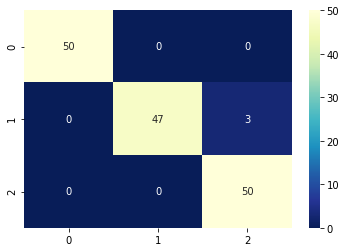

In [263]:
sns.heatmap(confmat, cmap="YlGnBu_r", annot=True, fmt="d")

In [255]:
report = metrics.classification_report(y, predict_y)
print(report)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       1.00      0.94      0.97        50
          2       0.94      1.00      0.97        50

avg / total       0.98      0.98      0.98       150

